In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("balanced_data1.csv")

# Separate features & target
X = df.drop(columns=["label"])
y = df["label"]

# Train-test split (67%-33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Preprocessing Complete!")


Data Preprocessing Complete!


In [5]:
#lr

🔹 Logistic Regression - Accuracy: 0.6043, Precision: 0.5780, Recall: 0.7723, F1: 0.6612


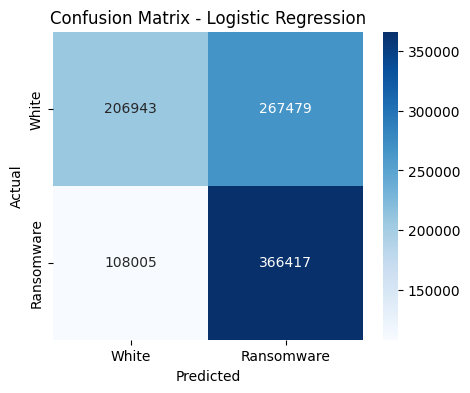

In [6]:
from sklearn.linear_model import LogisticRegression

# Hyperparameter tuning with GridSearchCV
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Train best model
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
cm = confusion_matrix(y_test, y_pred_lr)

print(f"🔹 Logistic Regression - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [7]:
#rf

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning with GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Train best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

print(f"🔹 Random Forest - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


KeyboardInterrupt: 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔹 Random Forest - Accuracy: 0.8960, Precision: 0.8835, Recall: 0.9123, F1: 0.8977


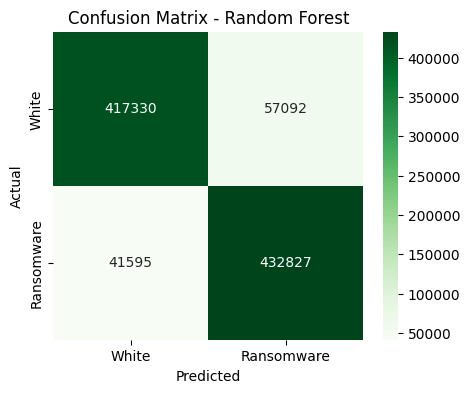

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space
param_dist = {
    "n_estimators": [50, 100],  # Reduce search space
    "max_depth": [10, 20],  # Limit depth
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 4], 
    "bootstrap": [True]  # Always bootstrap (generally better)
}

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    RandomForestClassifier(n_jobs=-1, random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Search 10 best combinations instead of 54
    scoring="f1",
    cv=3,  # Reduce folds for speed
    verbose=1,
    n_jobs=-1
)

# Train the model
random_search.fit(X_train, y_train)

# Get the best model
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

# Print evaluation results
print(f"🔹 Random Forest - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Fitting 3 folds for each of 15 candidates, totalling 45 fits
🔹 XGBoost - Accuracy: 0.8859, Precision: 0.8892, Recall: 0.8816, F1: 0.8854


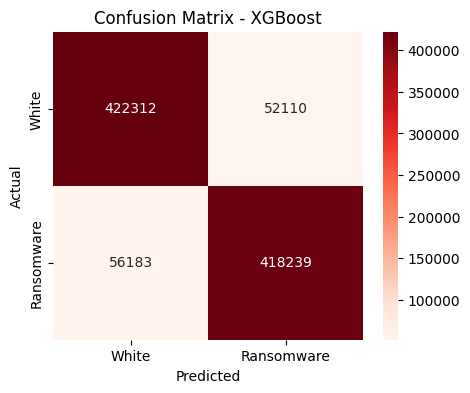

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter space
param_dist = {
    "n_estimators": [100, 200],  # Reduce search space
    "learning_rate": [0.01, 0.1, 0.2], 
    "max_depth": [3, 6],  # Reduce depth
    "min_child_weight": [1, 3],  # Simplify search
    "subsample": [0.8, 1.0], 
    "colsample_bytree": [0.8, 1.0]
}

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    param_distributions=param_dist,
    n_iter=15,  # Search 15 best combinations instead of 324
    scoring="f1",
    cv=3,  # Reduce folds for speed
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Train the model
random_search.fit(X_train, y_train)

# Get the best model
best_xgb = random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
cm = confusion_matrix(y_test, y_pred_xgb)

# Print evaluation results
print(f"🔹 XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [2]:
#lightGBM

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 963220, number of negative: 963220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1253
[LightGBM] [Info] Number of data points in the train set: 1926440, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
🔹 LightGBM - Accuracy: 0.8981, Precision: 0.9060, Recall: 0.8883, F1: 0.8971


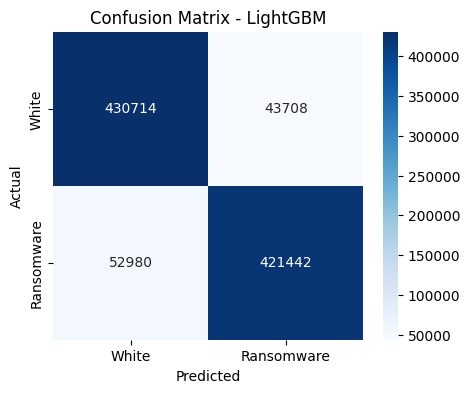

In [3]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter space
param_dist = {
    "num_leaves": [31, 50, 100],  
    "learning_rate": [0.01, 0.05, 0.1],  
    "max_depth": [-1, 10, 20],  
    "n_estimators": [100, 200],  
    "subsample": [0.8, 1.0],  
    "colsample_bytree": [0.8, 1.0]
}

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    LGBMClassifier(boosting_type="gbdt", objective="binary", random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=15,  # Search 15 best combinations
    scoring="f1",
    cv=3,  # Reduce folds for speed
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Train the model
random_search.fit(X_train, y_train)

# Get the best model
best_lgb = random_search.best_estimator_
y_pred_lgb = best_lgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lgb)
precision = precision_score(y_test, y_pred_lgb)
recall = recall_score(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
cm = confusion_matrix(y_test, y_pred_lgb)

# Print evaluation results
print(f"🔹 LightGBM - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM")
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔹 CatBoost - Accuracy: 0.8949, Precision: 0.8999, Recall: 0.8885, F1: 0.8942


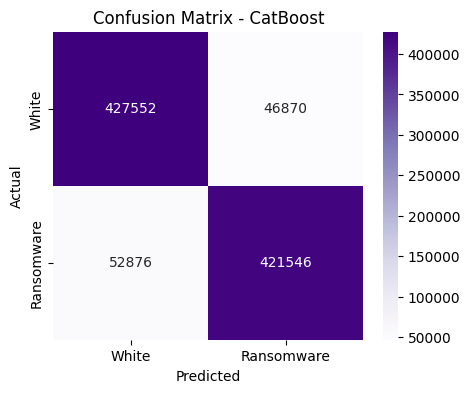

In [5]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space
param_dist = {
    "iterations": [500, 1000],  
    "learning_rate": [0.01, 0.05, 0.1],  
    "depth": [6, 8, 10],  
    "l2_leaf_reg": [3, 5, 7],  
    "border_count": [32, 64, 128]
}

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    CatBoostClassifier(loss_function="Logloss", verbose=0, random_seed=42),
    param_distributions=param_dist,
    n_iter=10,  # Faster than grid search
    scoring="f1",
    cv=3,  # Reduce folds for speed
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Train the model
random_search.fit(X_train, y_train)

# Get the best model
best_catboost = random_search.best_estimator_
y_pred_cat = best_catboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_cat)
precision = precision_score(y_test, y_pred_cat)
recall = recall_score(y_test, y_pred_cat)
f1 = f1_score(y_test, y_pred_cat)
cm = confusion_matrix(y_test, y_pred_cat)

# Print evaluation results
print(f"🔹 CatBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["White", "Ransomware"], yticklabels=["White", "Ransomware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()
